# Multidimensional Calibration Comparison

Goal: To compare two calibrations (corrections) at different points in impedance space

Method:
1. Create a set of "synthetic" standards in the DUT reference plane. These standards should have the following properties:
        + Occupy many points in impedance space
        + Be constant as a function of frequency
        + Be spaced further apart than the mean error
2. Use the reference (calibration with lowest uncertainty) to move the points to the measurement plane. This can be thought of uncorrecting the data
3. Use the comparison calibration to move the points from the measurement plane to the reference plane
4. Color code the points based on their distance from the original points 


In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds


In [2]:
# first choose the points
r1=.98
r2=.2
r3=.6
def create_synthetic_standards_DUT_plane(frequency_list,r1,r2,r3,**options):
    """Creates a set of points in the DUT reference plane, outputs a list of S2PV1 objects"""
    defaults={}
    standard_options={}
    for key,value in defaults.iteritems():
        standard_options[key]=value
    for key,value in options.iteritems():
        standard_options[key]=value
    output_list=[]
    s11_points=[]
    s21_points=[]
    for i in range(8):
        s11_points.append(cmath.rect(r1,cmath.pi*(i)/4))
    for i in range(4):
        s11_points.append(cmath.rect(r2,cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s11_points.append(cmath.rect(r3,cmath.pi*(i)/4+cmath.pi/8))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r1**2),cmath.pi*(i)/4))
    for i in range(4):
        s21_points.append(cmath.rect(np.sqrt(1-r2**2),cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r3**2),cmath.pi*(i)/4+cmath.pi/8))
    for index,point in enumerate(s11_points):
        data_list=[]
        for f in frequency_list:
            data_list.append([f,point,s21_points[index],s21_points[index],point])
        output_list.append(S2PV1(sparameter_complex=data_list,option_line='# GHz S RI R 50'))
    return output_list
            
def create_synthetic_standards_measurement_plane(r1,r2,r3,s4p,**options):
    """Creates a set of points in the DUT reference plane, outputs a list of S2PV1 objects"""
    defaults={}
    standard_options={}
    for key,value in defaults.iteritems():
        standard_options[key]=value
    for key,value in options.iteritems():
        standard_options[key]=value
    frequency_list=s4p["Frequency"]
    output_list=[]
    s11_points=[]
    s21_points=[]
    for i in range(8):
        s11_points.append(cmath.rect(r1,cmath.pi*(i)/4))
    for i in range(4):
        s11_points.append(cmath.rect(r2,cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s11_points.append(cmath.rect(r3,cmath.pi*(i)/4+cmath.pi/8))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r1**2),cmath.pi*(i)/4))
    for i in range(4):
        s21_points.append(cmath.rect(np.sqrt(1-r2**2),cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r3**2),cmath.pi*(i)/4+cmath.pi/8))
    for index,point in enumerate(s11_points):
        data_list=[]
        for f in frequency_list:
            data_list.append([f,point,s21_points[index],s21_points[index],point])
        measurement_data_list=uncorrect_sparameters_sixteen_term(sparameters_complex=data_list,
                                           sixteen_term_correction=s4p.sparameter_complex)
        output_list.append(S2PV1(sparameter_complex=measurement_data_list,option_line='# GHz S RI R 50'))
    return output_list
        

In [3]:
frequency_list=np.linspace(.2,50,201).tolist()

In [4]:
s2p_list=create_synthetic_standards_DUT_plane(frequency_list,r1,r2,r3)

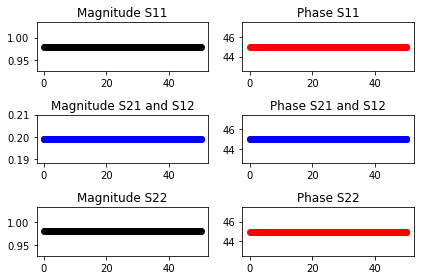

In [5]:
s2p_list[1].show();

In [6]:
print(s2p_list[-1])

# GHz S RI R 50
0.2  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
0.449  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
0.698  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
0.947  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
1.196  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
1.445  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
1.694  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
1.943  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
2.192  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
2.441  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
2.69  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
2.939  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
3.188  0.5543  -0.2296  0.7391  -0.3061  0.7391  -0.3061  0.5543  -0.2296
3.437  0.5543  -0.2296  0

In [28]:
len(s2p_list)

20

In [29]:
help(uncorrect_sparameters_sixteen_term)

Help on function uncorrect_sparameters_sixteen_term in module pyMeasure.Code.Analysis.SParameter:

uncorrect_sparameters_sixteen_term(sparameters_complex, sixteen_term_correction)
    Removes the sixteen term correction to sparameters and returns a new sparameter list.
    The sparameters should be a list of [frequency, S11, S21, S12, S22] where S terms are complex numbers.
    The sixteen term correction should be a list of
    [frequency, S11, S12, S13,S14,S21, S22,S23,S24,S31,S32,S33,S34,S41,S42,S43,S44], etc are complex numbers
    Designed to use S2P.sparameter_complex and SNP.sparameter_complex.
    Inverse of correct_sparameters_sixteen_term



In [6]:
reference_correction=SNP(r"C:\Share\8510calfiles\24Cal\MUF Result Files\Solutions\Solution_0.s4p",number_ports=4)

AttributeError: SNP instance has no attribute 'number_ports'

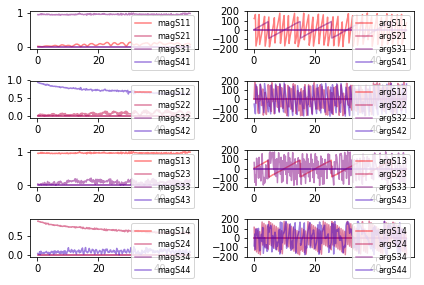

In [8]:
reference_correction.show();

In [9]:
test_s2p_complex=uncorrect_sparameters_sixteen_term(sparameters_complex=s2p_list[0].sparameter_complex,
                                            sixteen_term_correction=reference_correction.sparameter_complex)

In [10]:
s2p=S2PV1(sparameter_complex=test_s2p_complex)

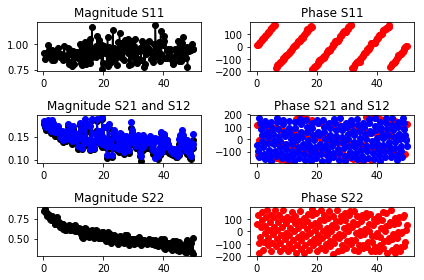

In [11]:
s2p.show();

In [12]:
dut_s2p_complex=correct_sparameters_sixteen_term(sparameters_complex=s2p.sparameter_complex,
                                            sixteen_term_correction=reference_correction.sparameter_complex)

In [13]:
s2p_dut=S2PV1(sparameter_complex=dut_s2p_complex)

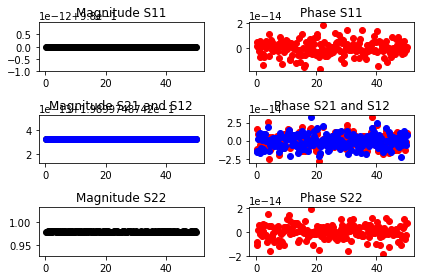

In [14]:
s2p_dut.show();

In [42]:
print(s2p_dut)

# GHz S RI R 50
0.2  0.98  2.54e-17  0.199  -3.816e-17  0.199  -5.413e-17  0.98  -1.791e-16
0.449  0.98  7.403e-17  0.199  5.677e-17  0.199  -5.185e-17  0.98  -1.368e-16
0.698  0.98  6.443e-18  0.199  3.173e-17  0.199  6.174e-18  0.98  3.04e-17
0.947  0.98  -3.975e-17  0.199  6.297e-18  0.199  3.185e-17  0.98  1.074e-16
1.196  0.98  -1.23e-16  0.199  -1.95e-17  0.199  -5.784e-17  0.98  7.551e-17
1.445  0.98  1.01e-16  0.199  -5.025e-20  0.199  3.829e-17  0.98  -3.316e-17
1.694  0.98  -7.568e-17  0.199  -5.141e-17  0.199  -3.544e-17  0.98  -3.7e-18
1.943  0.98  2.023e-17  0.199  -7.57e-18  0.199  5.209e-18  0.98  -5.645e-17
2.192  0.98  -8.321e-17  0.199  5.159e-18  0.199  3.072e-17  0.98  1.149e-16
2.441  0.98  -2.334e-16  0.199  -1.665e-17  0.199  -4.22e-17  0.98  2.218e-17
2.69  0.98  -1.189e-16  0.199  9.237e-18  0.199  -4.986e-17  0.98  -2.67e-17
2.939  0.98  7.076e-17  0.199  3.383e-17  0.199  3.383e-17  0.98  1.027e-16
3.188  0.98  -6.083e-19  0.199  -7.908e-18  0.199  4.871e-18 

In [10]:
reference_correction["Frequency"]

NameError: name 'reference_correction' is not defined

In [15]:
measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,reference_correction)

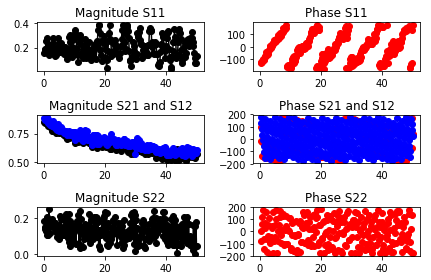

In [16]:
measurement_plane_s2ps[10].show();

In [17]:
dut_plane_s2ps=create_synthetic_standards_DUT_plane(reference_correction["Frequency"],r1,r2,r3)

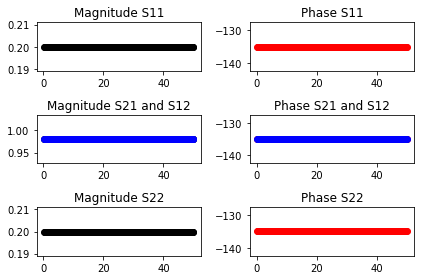

In [18]:
dut_plane_s2ps[10].show();

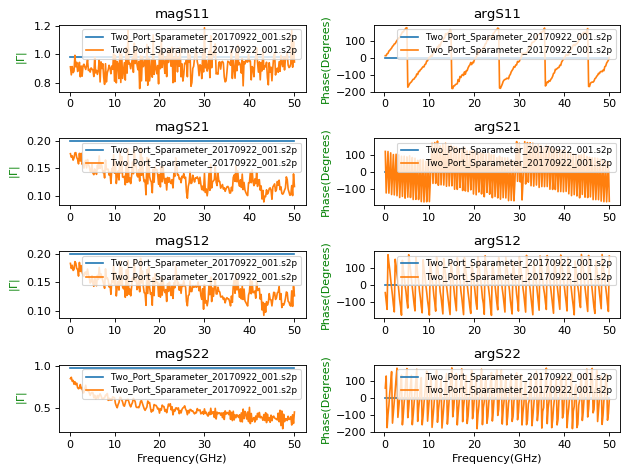

In [32]:
compare_s2p_plots([dut_plane_s2ps[0],measurement_plane_s2ps[0]]);

In [19]:
def correct_all_sixteen_term(s2p_list,correction):
    """Corrects all s2ps in list and returns a new list of corrected DUTs"""
    output_list=[]
    for s2p in s2p_list:
        corrected_s2p=correct_sparameters_sixteen_term(sparameters_complex=s2p.sparameter_complex,
                                                       sixteen_term_correction=correction.sparameter_complex)
        output_list.append(S2PV1(sparameter_complex=corrected_s2p))
    return output_list


In [20]:
test_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,reference_correction)

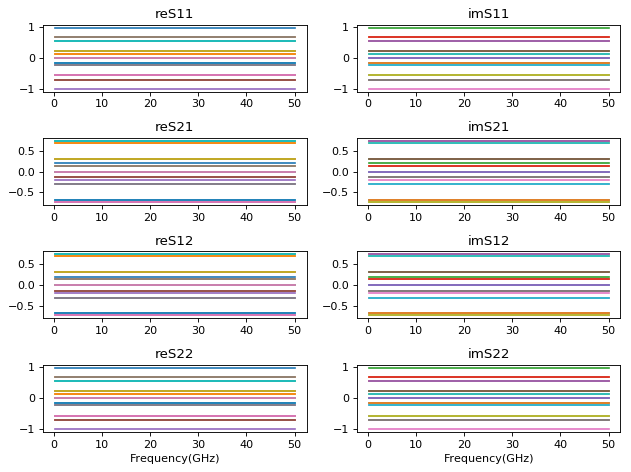

In [21]:
compare_s2p_plots(dut_plane_s2ps,display_legend=False,format="RI");

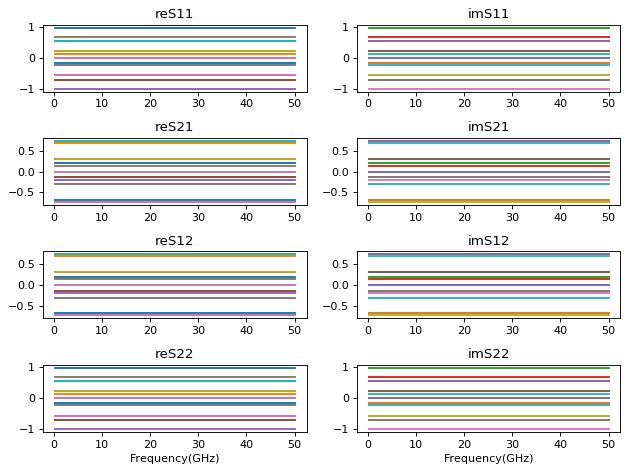

In [22]:
compare_s2p_plots(dut_plane_s2ps+test_dut_plane,display_legend=False,format="RI");

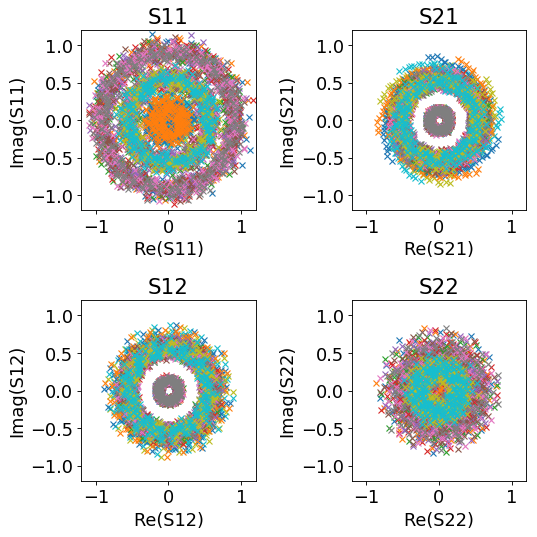

In [28]:
plt.rcParams.update({'font.size': 16})
map(lambda x: x.change_data_format("RI"),measurement_plane_s2ps)
s2ps=measurement_plane_s2ps
fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
plot_names=["S11","S21","S12","S22"]
for s2p in s2ps:
    for index,ax in enumerate(axes.flat):
        ax.plot(s2p["re{0}".format(plot_names[index])],
                s2p["im{0}".format(plot_names[index])],'x');
        ax.set_ylim([-1.2,1.2]);
        ax.set_xlim([-1.2,1.2]);
        ax.set_title(plot_names[index]);
        ax.set_xlabel("Re({0})".format(plot_names[index]))
        ax.set_ylabel("Imag({0})".format(plot_names[index]))
plt.tight_layout()
plt.show()

In [26]:
def two_port_complex_plot(s2p_list,**options):
    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]
    for s2p in s2p_list:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'o',fillstyle='none',markersize=10);
            ax.set_ylim([-1.2,1.2]);
            ax.set_xlim([-1.2,1.2]);
            ax.set_title(plot_names[index]);
            ax.set_xlabel("Re({0})".format(plot_names[index]))
            ax.set_ylabel("Imag({0})".format(plot_names[index]))
    plt.tight_layout()
    plt.show()

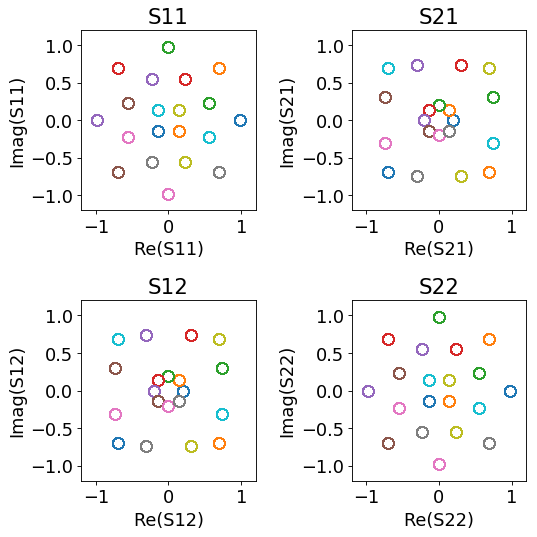

In [29]:
two_port_complex_plot(dut_plane_s2ps)

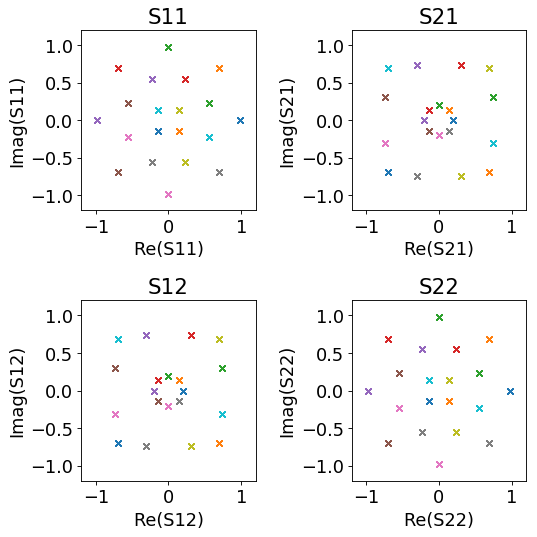

In [87]:
two_port_complex_plot(test_dut_plane)

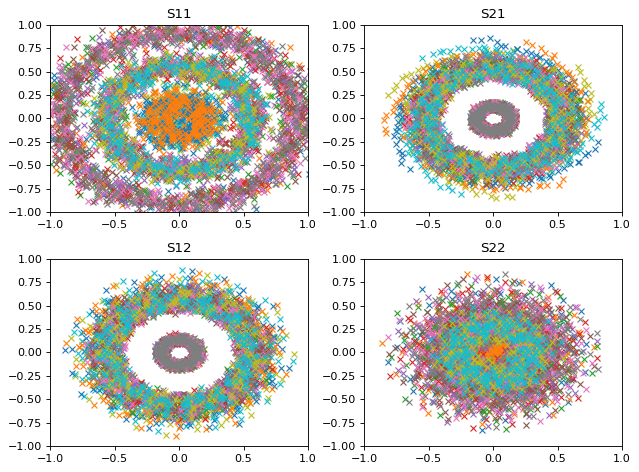

In [104]:
two_port_complex_plot(measurement_plane_s2ps)

In [52]:
comparison_correction=SNP(r"C:\Share\8510calfiles\24Cal\SOLT\MUF Results\Solutions\Solution_0.s4p",
                         number_ports=4)
comparison_correction_2=SNP(r"C:\Share\8510calfiles\24Cal\SOLT\SOLT-24_Data_Models_vnauncert_Results\Solutions\Solution_0.s4p",
                         number_ports=4)

In [53]:
comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,comparison_correction)
comparison_s2ps_dut_plane_2=correct_all_sixteen_term(measurement_plane_s2ps,comparison_correction_2)

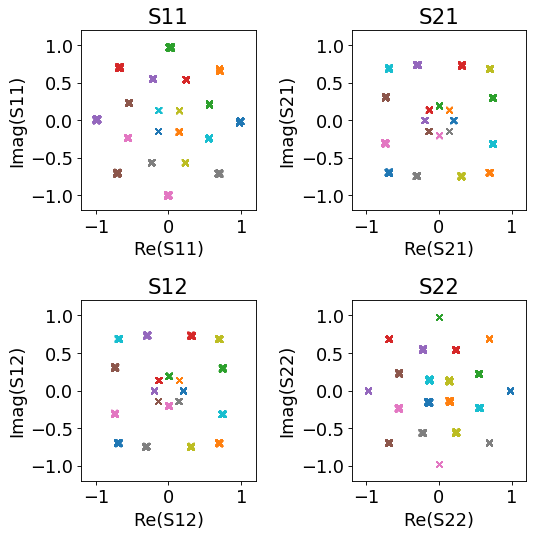

In [92]:
two_port_complex_plot(comparison_s2ps_dut_plane)

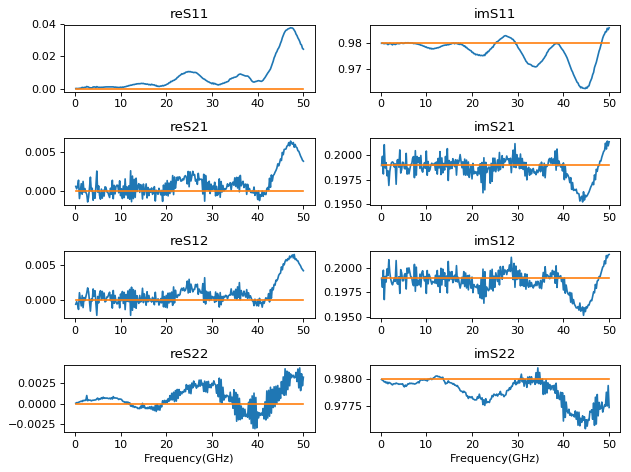

In [201]:
compare_s2p_plots([comparison_s2ps_dut_plane[2],dut_plane_s2ps[2]],display_legend=False,format="RI");

In [107]:
def two_port_complex_plot_compare(s2p_list_1,s2p_list_2,**options):
    map(lambda x: x.change_data_format("RI"),s2p_list_1)
    map(lambda x: x.change_data_format("RI"),s2p_list_2)


    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]

    for s2p in s2p_list_2:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'bx');
            ax.set_ylim([-1.1,1.1]);
            ax.set_xlim([-1.1,1.1]);
            ax.set_title(plot_names[index]);
            #ax.set_xlabel("Re({0})".format(plot_names[index]))
            #ax.set_ylabel("Imag({0})".format(plot_names[index]))
    for s2p in s2p_list_1:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'yo',fillstyle='none',markersize=10);
            ax.set_ylim([.9,1.1]);
            ax.set_xlim([-.1,.1]);
            ax.set_title(plot_names[index]);
    plt.tight_layout()
    plt.show()

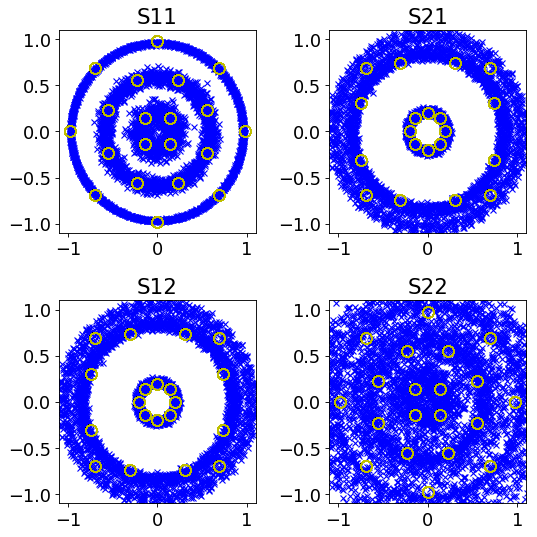

In [94]:
two_port_complex_plot_compare(dut_plane_s2ps,comparison_s2ps_dut_plane_2)

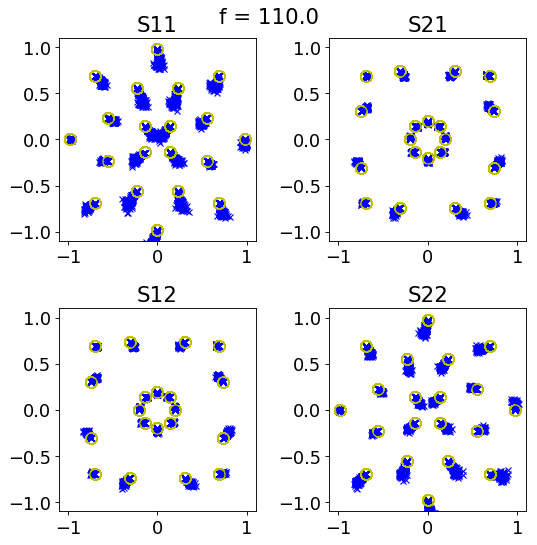

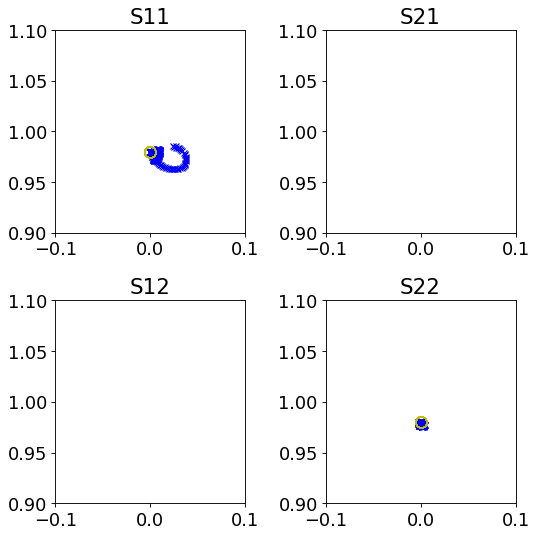

In [108]:
two_port_complex_plot_compare(dut_plane_s2ps,comparison_s2ps_dut_plane)

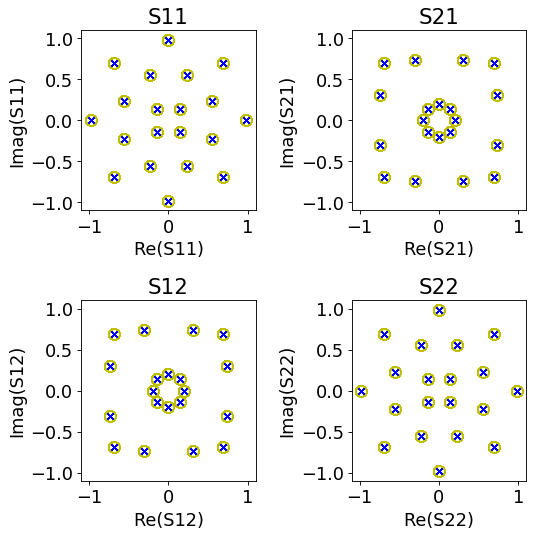

In [91]:
two_port_complex_plot_compare(dut_plane_s2ps,dut_plane_s2ps)

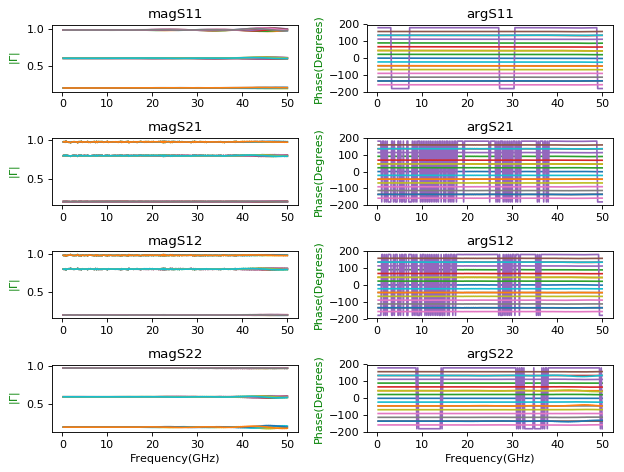

In [167]:
compare_s2p_plots(comparison_s2ps_dut_plane,display_legend=False,format="MA");

In [99]:
def compare_calibrations_script(c1_path,c2_path):
    """"""
    c1=SNP(c1_path,number_ports=4)
    c2=SNP(c2_path,number_ports=4)
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
    two_port_complex_plot_compare(s2p_list,comparison_s2ps_dut_plane)
    


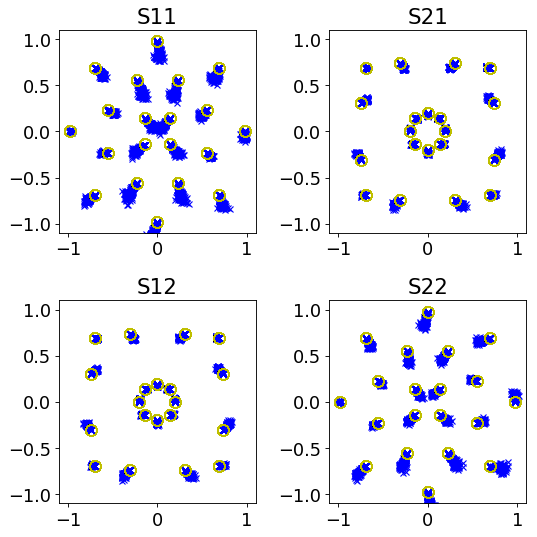

In [100]:

c1_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_To50ohm_AtRefHalfThru_0.s4p"
c2_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_0.s4p"
compare_calibrations_script(c1_path,c2_path)

In [209]:
%matplotlib wx
import matplotlib.animation as animation
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

In [101]:
def two_port_complex_plot_compare_animate(s2p_list_1,s2p_list_2,**options):
    map(lambda x: x.change_data_format("RI"),s2p_list_1)
    map(lambda x: x.change_data_format("RI"),s2p_list_2)


    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]
    images=[]
    frequency_list=s2p_list_2[0]["Frequency"]
    for f_index,f in enumerate(frequency_list):
    
        for s2p in s2p_list_2:
            for index,ax in enumerate(axes.flat):
                ax.plot(s2p["re{0}".format(plot_names[index])][f_index],
                        s2p["im{0}".format(plot_names[index])][f_index],'bx');
                ax.set_ylim([-1.1,1.1]);
                ax.set_xlim([-1.1,1.1]);
                ax.set_title(plot_names[index]); 
        for s2p in s2p_list_1:
            for index,ax in enumerate(axes.flat):
                ax.plot(s2p["re{0}".format(plot_names[index])][f_index],
                        s2p["im{0}".format(plot_names[index])][f_index],'yo',fillstyle='none',markersize=10);
                ax.set_ylim([-1.1,1.1]);
                ax.set_xlim([-1.1,1.1]);
                ax.set_title(plot_names[index]);
        fig.suptitle("f = {0}".format(f))
        
        plt.tight_layout()
        plt.savefig("C:\Share\Calibration_Comparison\TRLvsSeriesR4\Calibration_Compare_f_{0}.png".format(f))

In [210]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):T
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

In [105]:
def compare_calibrations_script(c1_path,c2_path):
    """"""
    c1=SNP(c1_path,number_ports=4)
    c2=SNP(c2_path,number_ports=4)
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
    two_port_complex_plot_compare_animate(s2p_list,comparison_s2ps_dut_plane)

In [223]:
c1_path=r"C:\Share\8510calfiles\24Cal\MUF Result Files\Solutions\Solution_0.s4p"
c2_path=r"C:\Share\8510calfiles\24Cal\SOLT\MUF Results\Solutions\Solution_0.s4p"
compare_calibrations_script(c1_path,c2_path)

In [106]:
c1_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_To50ohm_AtRefHalfThru_0.s4p"
c2_path=r"C:\Users\sandersa\Desktop\Chris Rs vs TRL\Solution_0.s4p"
compare_calibrations_script(c1_path,c2_path)